In [1]:
import os
import numpy as np 
import surveysim.stats
from astropy.io import fits
from astropy.time import Time

# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
_dir = '/global/cscratch1/sd/chahah/desisurvey_output'

In [3]:
def surveysim_summary(texp, footprint, version=8, deepfirst=False, twilight=False):

    _file = ('%is_bgs%i_skybranch_v%i%s.brightsky%s%s' % 
             (texp, footprint, version, ['', '.twilight'][twilight], ['', '.deepfirst'][deepfirst], ['.bgs%i' % footprint, ''][footprint == 14000]))

    fstats = os.path.join(_dir, 'stats_%s.fits' % _file)
    stats = surveysim.stats.SurveyStatistics(restore=fstats, bgs_footprint=[footprint, None][footprint == 14000])

    fexps = os.path.join(_dir, 'exposures_%s.fits' % _file)
    exps = fits.getdata(fexps, 'exposures')
    
    stats.summarize()
    
    actual = np.cumsum(stats._data['completed'], axis=0)

    third_pass = stats.tiles.program_passes['BRIGHT'][-1]
    npass = stats.tiles.pass_ntiles[third_pass]
    passidx = stats.tiles.pass_index[third_pass]
    bgs_complete = (actual[:,passidx] / npass) == 1.

    dt = 1 + np.arange(len(stats._data))
    print('BGS finishes 3rd passs on day %i of %i' % (dt[bgs_complete].min(), dt[-1]))
    print('  %.3f percent margin' % (100.*(dt[-1] - dt[bgs_complete].min())/dt[-1]))

    # get BGS tiles
    _pass = np.zeros(len(stats.tiles.passnum)).astype(bool)
    for i in range(3):
        _pass = _pass | (stats.tiles.passnum == stats.tiles.program_passes['BRIGHT'][i-3])

    tileid_pass = stats.tiles.tileID[_pass]
    _, m0, m1 = np.intersect1d(exps['TILEID'], tileid_pass, return_indices=True)
        
    t_exps = Time(exps['MJD'], format='mjd')
    
    fig = plt.figure(figsize=(16, 8))
    for year in range(5): 
        inyear = (t_exps[m0].decimalyear >= t_exps.decimalyear.min() + year) & (t_exps[m0].decimalyear < t_exps.decimalyear.min() + year + 1)

        sub = fig.add_subplot(2,3,year+1)
        sub.scatter(((stats.tiles.tileRA[_pass][m1][inyear] - 80) % 360) + 80, stats.tiles.tileDEC[_pass][m1][inyear], s=5, c='k')
        sub.set_xlim(80, 440)
        sub.set_ylim(-25., 90.)
        sub.text(0.95, 0.95, 'Year %i' % (year+1), transform=sub.transAxes, ha='right', va='top', fontsize=20)
        if year not in [0, 3]: 
            sub.set_yticklabels([])
        if year < 2: 
            sub.set_xticklabels([])
            
    bkgd = fig.add_subplot(111, frameon=False)
    bkgd.set_xlabel(r'RA', labelpad=10, fontsize=25) 
    bkgd.set_ylabel(r'Dec', labelpad=10, fontsize=25) 
    bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    fig.subplots_adjust(wspace=0.1, hspace=0.1)
    return fig 
#     fig, sub = stats.plot()
    
#     # get BGS tiles
#     _pass = np.zeros(len(stats.tiles.passnum)).astype(bool)
#     for i in range(3):
#         _pass = _pass | (stats.tiles.passnum == stats.tiles.program_passes['BRIGHT'][i-3])

#     tileid_pass = stats.tiles.tileID[_pass]
#     _, m0, m1 = np.intersect1d(exps['TILEID'], tileid_pass, return_indices=True)
    
#     fig = plt.figure(figsize=(10,5))
#     sub = fig.add_subplot(111)

#     sub.scatter(((stats.tiles.tileRA[_pass] - 80) % 360) + 80, stats.tiles.tileDEC[_pass], s=5, c='k')
#     sub.set_xlim(80, 440)
#     sub.set_ylabel('Dec', fontsize=25)
#     sub.set_ylim(-25., 90.)
#     sub.set_xlabel('RA', fontsize=25)

    
#     fig = plt.figure(figsize=(6,6))
#     sub = fig.add_subplot(111)
#     sub.hist(exps['SKY'][m0], range=(0., 5), bins=50)
#     #sub.plot([2.5, 2.5], [0., 750], c='k', ls='--')
#     sub.text(0.95, 0.95, 'median=%.2f' %np.median(exps['SKY'][m0]), transform=sub.transAxes, ha='right', va='top', fontsize=20)
#     sub.set_xlabel('sky brightness exposure factor', fontsize=25)
#     sub.set_xlim(0., 5)

(15984,)
INFO:stats.py:79:__init__: Restored stats from /global/cscratch1/sd/chahah/desisurvey_output/stats_300s_bgs14000_skybranch_v8.brightsky.fits
INFO:stats.py:81:__init__:   Comment: "".
Scheduled 10545.349 hr Open 74.915% Live 74.277%
PROG PASS    TILES  NEXP SETUP ABT SPLIT ABT    TEXP TSETUP TSPLIT   TOPEN  TDEAD
DARK   1 2011/1998  5996  2952  14  3044  11 1856.1s 176.5s  91.0s
DARK   2 2007/1998  6146  3028  16  3118   3 1948.3s 181.5s  93.3s
DARK   3 2010/1998  5959  2888  15  3071   3 1966.8s 172.9s  91.7s
DARK   4 2005/1998  6242  3222  14  3020   4 1836.1s 193.3s  90.4s
DARK     8033/7992 24343 12090  59 12253  21 1901.8s 181.1s  91.6s 2294.1s 114.2s
----------------------------------------------------------------------------------
GRAY   0 2010/1998  6067  3040  19  3027   7 1863.8s 182.0s  90.5s
GRAY     2010/1998  6067  3040  19  3027   7 1863.8s 182.0s  90.5s 2322.9s 208.4s
----------------------------------------------------------------------------------
BRIGHT 5 200

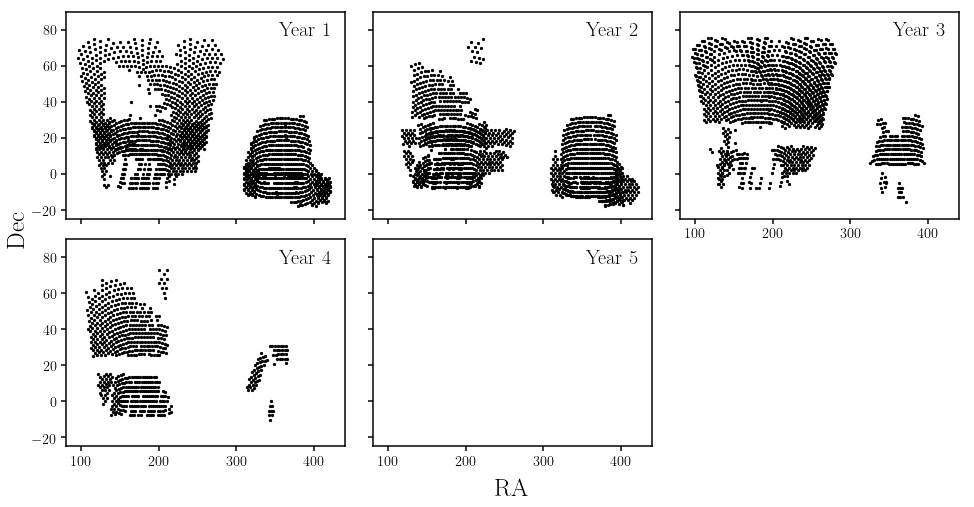

In [5]:
fig = surveysim_summary(300, 14000, version=8, deepfirst=False, twilight=False)
fig.savefig('figs/strategysim.pdf', bbox_inches='tight')